# Unsupervised Learning - Hierarchical Clustering

In [1]:
#import packages + data

import pandas as pd 
import matplotlib.pyplot as plt
import sklearn 
from sklearn import datasets
from sklearn import metrics
import sklearn.model_selection
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn import cluster

ds = pd.read_csv("file:///Users//erynrigley//Downloads//SocioEconomic.csv")

In [2]:
#Clean data

label_encoder = preprocessing.LabelEncoder() 
ds['Area'] = label_encoder.fit_transform(ds['Area'])
ds['Sex'] = label_encoder.fit_transform(ds['Sex'])
ds['SocioEconomic Class'] = label_encoder.fit_transform(ds['SocioEconomic Class'])

In [3]:
#Use percentages only + order data into labels + feautures

ds = ds.drop(columns = 'Irish Speakers')
ds = ds.drop(columns = 'Non-Irish Speakers')
ds = ds.drop(columns = 'Not Stated')

ds = ds[['Irish Speakers(%)', 'Year', 'Area', 'Sex', 'SocioEconomic Class', 'Population']]

In [4]:
#segment into labels and features

X = ds.values[:,1:].astype(int)
Y = ds.values[:,0].astype(int)

In [5]:
#standardise X only for unsupervised learning (no labels, just features)

dataset1_standardized = preprocessing.scale(X)

# Social Class

WARD LINKAGE

LOW HOMOGENIETY, SILHOUETTE SCORE, OK COMPLETENESS SCORE, WELL/EVENLY DIVIDED DENDROGRAM

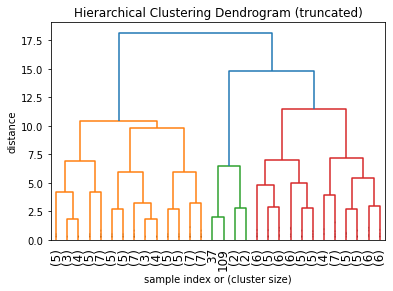

In [6]:
# Hierarchical clustering for the socio-economic dataset

from scipy.cluster.hierarchy import dendrogram, linkage

#creating the dendrogram
H_cluster = linkage(dataset1_standardized,'ward') #ward linkage on features only (no labels = unsupervised learning) 
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    H_cluster,
    truncate_mode='lastp',  # show only the last 30 merged clusters
    p=30,  
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
)
plt.show()

We can see the data is set into two groups, then within that there are another two groups, divided again into 8 groups and so on. This gives a good footing to pick which number of clusters to group and analyse further, for we can best see the strength of those groups. 

In [9]:
#creaing cluster centroids

from scipy.cluster.hierarchy import fcluster
k=5 #try 5 cluster centroids

#creating 5 clusters from Hierarchical Clustering of features only
cluster_x = fcluster(H_cluster, k, criterion='maxclust')
cluster_x[0:30:,] 
cluster_Hierarchical = pd.DataFrame(cluster_x)

#adding clusters to ds
ds['cluster'] = cluster_Hierarchical
ds

#grouping ds by cluster centroids
h_mean_clusterx = pd.DataFrame(round(ds.groupby('cluster').mean(),1))
h_mean_clusterx

,Irish Speakers(%),Year,Area,Sex,SocioEconomic Class,Population
cluster,,,,,,
1,68.0,2013.5,0.0,0.0,5.5,16059.8
2,67.9,2013.5,0.0,1.5,5.5,8029.9
3,39.6,2013.5,1.0,1.0,1.0,2979964.0
4,38.6,2011.0,1.0,1.0,5.9,264886.7
5,36.4,2016.0,1.0,1.0,5.9,276924.9


In [10]:
#metrics comparing Y(labels) to clusters(predictions)

print(metrics.homogeneity_score(Y, cluster_x))
print(metrics.completeness_score(Y, cluster_x))
print(metrics.silhouette_score(X, cluster_x))

0.25685605250771015
0.6524020523262607
-0.014641403720863307


SINGLE = HIGH SILHOUETTE AND COMPLETENESS SCORES
         LOW HOMOEGENEITY SCORE


                  UNEVENLY DIVIDED DENDROGRAM

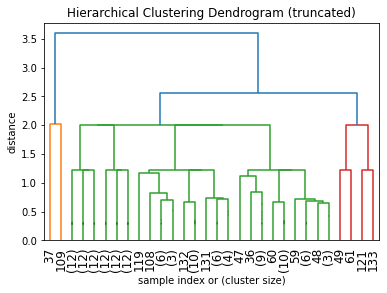

,Irish Speakers(%),Year,Area,Sex,SocioEconomic Class,Population
cluster,,,,,,
1,68.0,2013.5,0.0,0.0,5.5,16059.8
2,67.9,2013.5,0.0,1.5,5.5,8029.9
3,39.6,2013.5,1.0,1.0,1.0,2979964.0
4,38.6,2011.0,1.0,1.0,5.9,264886.7
5,36.4,2016.0,1.0,1.0,5.9,276924.9


In [11]:
#create dendrogram

H_cluster = linkage(dataset1_standardized,'single') #repeate with single linkage method instead of ward
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    H_cluster,
    truncate_mode='lastp',  # show only the last 30 merged clusters
    p=30,  
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  
)
plt.show()

#repeate code
##create 5 cluster centroids

k=5
cluster_xx = fcluster(H_cluster, k, criterion='maxclust')
cluster_xx[0:30:,]

cluster_Hierarchical = pd.DataFrame(cluster_x)

ds['cluster'] = cluster_Hierarchical
ds

h_mean_clusterxx = pd.DataFrame(round(ds.groupby('cluster').mean(),1))
h_mean_clusterxx

In [12]:
#cluster metrics

print(metrics.homogeneity_score(Y, cluster_xx))
print(metrics.completeness_score(Y, cluster_xx))
print(metrics.silhouette_score(X, cluster_xx))

0.04825318423859984
0.7894418796161412
0.8728200298963594


We can see from these clusters, that the greatest correlations with Irish Speakers(%) is social class and population. One of the largest differences in IrishSpeakers(%), cluster 2 with 67.9% to cluster 3 with 39.6%, is also one of the largest differences in population, 8029 to 2,979,964. Moreover, this is one of the largest differences in class, from 5.5, to 1.

We also have a very good silhouette and completeness score using the 'single' linkage method, whilst homogeneity is not good.


We can follow the same procedure on one of the other data sets....

# Age 

Scores:

WARD = evenly divided dendrogram, poor scores all

COMPLETE = uneven dendrogram, poor scores all

AVERAGE = uneven dendrogram, poor scores all

SINGLE = uneven dendrogram, poor scores all

In [13]:
#import data for Age Groups

ds2 = pd.read_csv("file:///Users//erynrigley//Downloads//AgeGroup.csv")

In [14]:
#cleaning age data

label_encoder = preprocessing.LabelEncoder() 
ds2['Area'] = label_encoder.fit_transform(ds2['Area'])
ds2['Age Group'] = label_encoder.fit_transform(ds2['Age Group'])

In [15]:
#dropping #Irish speakers for %Irish Speakers

ds2 = ds2.drop(columns = 'Irish Speakers')
ds2 = ds2.drop(columns = 'Non-Irish Speakers')
ds2 = ds2.drop(columns = 'Not Stated')

ds2 = ds2[['Irish Speakers(%)', 'Year', 'Area', 'Age Group', 'Population']]

In [16]:
#segmenting into labels + features

X = ds2.values[:,1:].astype(int)
Y = ds2.values[:,0].astype(int)
dataset2_standardized = preprocessing.scale(X)

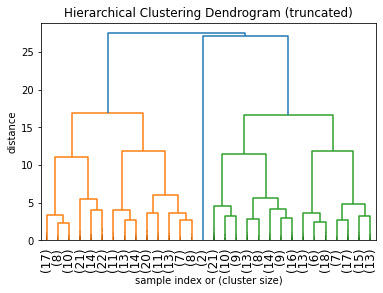

In [17]:
#Repeate Hierarchical Code from above
## create dendrogram on features only

H_cluster = linkage(dataset2_standardized,'ward') #features only
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    H_cluster,
    truncate_mode='lastp',  # show only the last 30 merged clusters
    p=30,  
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
)
plt.show()

In [18]:
# create cluster centroids 

from scipy.cluster.hierarchy import fcluster
k=10
cluster_2 = fcluster(H_cluster, k, criterion='maxclust')
cluster_2[0:30:,]

#add to ds
cluster_Hierarchical = pd.DataFrame(cluster_2)
ds2['cluster'] = cluster_Hierarchical
ds2

#round dataset by clusters
h_mean_cluster2 = pd.DataFrame(round(ds2.groupby('cluster').mean(),1))
h_mean_cluster2

,Irish Speakers(%),Year,Area,Age Group,Population
cluster,,,,,
1,67.1,2011.0,2.2,3.1,1875.5
2,69.3,2011.0,1.8,12.2,4262.9
3,60.4,2011.0,6.5,14.9,15745.9
4,66.4,2011.0,6.9,2.6,44863.3
5,59.1,2011.0,7.4,8.6,87835.9
6,39.6,2013.5,8.0,18.0,4469946.0
7,63.0,2016.0,7.2,3.7,78281.5
8,56.8,2016.0,6.5,12.6,24873.8
9,67.2,2016.0,1.7,14.6,5937.9


In [19]:
#cluster metrics

print(metrics.homogeneity_score(Y, cluster_2))
print(metrics.completeness_score(Y, cluster_2))
print(metrics.silhouette_score(X, cluster_2))

0.1929237404628095
0.35284619666158895
-0.5524275917813293


More clusters were made here, for there wasn't as great a variance among fewer clusters. 

Among these clusters, we can see the trend we would expect from our statistical analysis. Clusters with lower age groups saw higher rates of Irish Speakers. This changes around Agr group 12.6, where the Irish Speakers rates begins to drop, and then around Age Group 18, we can see Irish speakers falls to around 39.6. This is in keeping with previous found correlations between Population. 

# Year

Scores:

WARD = even dendrogram, poor silhouette + homogeneity, ok completeness 

0.2762304363224675
0.63948537942962
0.06119497264037834

AVERAGE = Even dendrogram, poor silhouette + homogeneity, ok completeness 
0.5502480336059228
0.7151249538985945
-0.06174457135631873

SINGLE = Not good dendgrogram with poor distance, okay completeness poor silhouette and homogeneity

COMPLETE = Even dendrogram, poor silhouette + homogeneity, ok completeness 
0.2630071124822647
0.6490596041430846
-0.11361627995570561

In [20]:
#import province dataset for Years analysis
##(province has the best data on years)

ds3 = pd.read_csv("file:///Users//erynrigley//Downloads//Province.csv")
ds3

,Year,Province,Irish Speakers(%),Irish Speakers,Non-Irish Speakers,Total Population
0,1861,Connacht,44.8,409482.0,503653.0,913135.0
1,1861,Leinster,2.4,35704.0,1421931.0,1457635.0
2,1861,Munster,36.0,545531.0,968027.0,1513558.0
3,1861,State,24.5,1077087.0,3325024.0,4402111.0
4,1861,Ulster (pt),16.7,86370.0,431413.0,517783.0
...,...,...,...,...,...,...
90,2016,Connacht,44.2,233807.0,295485.0,529292.0
91,2016,Leinster,35.5,897357.0,1628022.0,2525379.0
92,2016,Munster,42.8,526243.0,703833.0,1230076.0
93,2016,State,38.5,1761420.0,2807841.0,4569261.0


In [21]:
#clean data

label_encoder = preprocessing.LabelEncoder() 
ds3['Province'] = label_encoder.fit_transform(ds3['Province'])

In [22]:
#delete #Irish Speakers for %Irish Speakers

ds3 = ds3.drop(columns = 'Irish Speakers')
ds3 = ds3.drop(columns = 'Non-Irish Speakers')

ds3 = ds3[['Irish Speakers(%)', 'Year', 'Province', 'Total Population']]

In [23]:
#segment data into labels + features 

X = ds3.values[:,1:].astype(int)
Y = ds3.values[:,0].astype(int)
dataset3_standardized = preprocessing.scale(X)

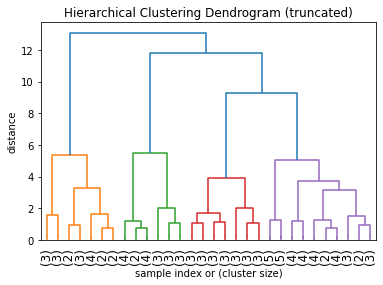

In [24]:
#Repeate Hierarchical Cluster code above

H_cluster = linkage(dataset3_standardized,'ward') #features only
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    H_cluster,
    truncate_mode='lastp',  # show only the last 30 merged clusters
    p=30,  
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
)
plt.show()

In [25]:
#creating cluster centroids 
from scipy.cluster.hierarchy import fcluster
k=5
cluster_3 = fcluster(H_cluster, k, criterion='maxclust')
cluster_3[0:30:,]

#add to ds
cluster_Hierarchical = pd.DataFrame(cluster_3)
ds3['cluster'] = cluster_Hierarchical
ds3

#round ds by clusters
h_mean_cluster3 = pd.DataFrame(round(ds3.groupby('cluster').mean(),1))
h_mean_cluster3

,Irish Speakers(%),Year,Province,Total Population
cluster,,,,
1,28.5,1949.7,3.0,3480795.2
2,34.5,1992.1,4.0,234034.8
3,20.9,1902.7,4.0,365356.1
4,25.1,1893.1,0.9,1007146.3
5,34.5,1982.8,1.1,1093235.6


In [26]:
#cluster metrics

print(metrics.homogeneity_score(Y, cluster_3))
print(metrics.completeness_score(Y, cluster_3))
print(metrics.silhouette_score(X, cluster_3))

0.2762304363224675
0.63948537942962
0.06119497264037834


Again, more clusters were added, so as to see the whole range of Irish Speakers (%) and Year. 

We can see the same trends as we would expect to see from our statistical analysis. Time and population have great impact on the rate of Irish Speakers, with higher rates in the late 20th century, and lower populations. 

For instance cluster 2 in 1992 ad with a population of 234,034 has 10% higher Irish Speaking rate than 100 years prior in 1893 with population 1,007,146.

To learn more we can add more clusters

In [30]:
#try with 15 clusters

k=15
cluster_3x = fcluster(H_cluster, k, criterion='maxclust')
cluster_3x[0:30:,]

cluster_Hierarchical = pd.DataFrame(cluster_3x)

ds3['cluster'] = cluster_Hierarchical
ds3

h_mean_cluster3 = pd.DataFrame(round(ds3.groupby('cluster').mean(),1))
h_mean_cluster3

,Irish Speakers(%),Year,Province,Total Population
cluster,,,,
1,20.7,1886.0,3.0,3692587.2
2,23.9,1948.0,3.0,2760860.0
3,34.1,1988.5,3.0,3356688.2
4,40.4,2008.8,3.0,4187133.2
5,34.5,1992.1,4.0,234034.8
6,26.1,1936.0,4.0,265776.0
7,18.4,1886.0,4.0,415146.2
8,2.1,1886.0,1.0,1263118.0
9,28.5,1886.0,2.0,1253707.2


In [28]:
#cluster metrics

print(metrics.homogeneity_score(Y, cluster_3x))
print(metrics.completeness_score(Y, cluster_3x))
print(metrics.silhouette_score(X, cluster_3x))

0.5595753899819108
0.727979879569326
-0.0030571025376113633


We can see from this, that time has a greater impact than population. For instance, cluster 8 with an Irish Speaking rate of 2.1 in 1886 had a population of 1,263,118. Over 100 years later in 2008, the rate has increased to 40%. However, population has increased 4,187,133. This is contrary to our other data analysis. As such, time must have a greater impact on Irish Speaking rate than population. 

This is an important discovery. 

For, with this information, we can traject that the other attributes which have impacted Irish speaking rate over time, such as education, can increase the rate of Irish Speakers in spite of growing populations. This gives hope for the future, if we continue with Irish education, but implement outside of schools, more populated areas such as cities can indeed use Irish and a high rate language. 

For all the algorithms, the silhouette score is very low. So too is the homogeneity score. 